<a href="https://colab.research.google.com/github/Jordy-Rodrigues/Modelo-de-detec-o-de-fraudes/blob/main/Detec%C3%A7%C3%A3o_de_fraudes_em_transfer%C3%AAncias_banc%C3%A1rias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# BIBLIOTECAS NECESSÁRIAS
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

# BIBLIOTECAS UTILIZADAS NO PRÉ PROCESSAMENTO DOS DADOS
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# BIBLIOTECAS UTILIZADAS NA CONSTRUÇÃO DE MÁQUINAS PREDITIVAS
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

# BIBLIOTECAS UTILIZADAS NA AVALIAÇÃO DAS MÁQUINAS

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [34]:
# CARREGAR OS DADOS
base = pd.read_csv('/content/drive/MyDrive/transferencias.csv')
base.head()

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
# VERIFICAR INFORMAÇÕES 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        284807 non-null  float64
 1   pais             284807 non-null  float64
 2   cidade           284807 non-null  float64
 3   bairro           284807 non-null  float64
 4   cep              284807 non-null  float64
 5   ip               284807 non-null  float64
 6   dia              284807 non-null  float64
 7   hora             284807 non-null  float64
 8   minuto           284807 non-null  float64
 9   so               284807 non-null  float64
 10  valor            284807 non-null  float64
 11  antecedentes     284807 non-null  float64
 12  reclamacoes      284807 non-null  float64
 13  qtd_trans        284807 non-null  float64
 14  crt              284807 non-null  float64
 15  limite_global    284807 non-null  float64
 16  tipo_crt         284807 non-null  floa

In [36]:
# VERIFICANDO VALORES AUSENTES E LINHAS DUPLICADAS
base.isna().sum()

Timestamp          0
pais               0
cidade             0
bairro             0
cep                0
ip                 0
dia                0
hora               0
minuto             0
so                 0
valor              0
antecedentes       0
reclamacoes        0
qtd_trans          0
crt                0
limite_global      0
tipo_crt           0
estabelecimento    0
contas             0
emprestimos        0
navegador          0
android            0
ios                0
compras            0
hist_navegacao     0
relacionamento     0
ind_seguranca      0
tempo_transacao    0
lim_crt            0
hist_saldo         0
Target             0
dtype: int64

In [37]:
# EXCLUIR DA BASE DE DADOS VALORES VAZIOS
base.dropna (inplace=True) # NA BASE DE DADOS NÃO TEM VALORES VAZIOS, MAIS SI TIVESSE ESSE ALGORITMO IRIA RESOLVER ISSO

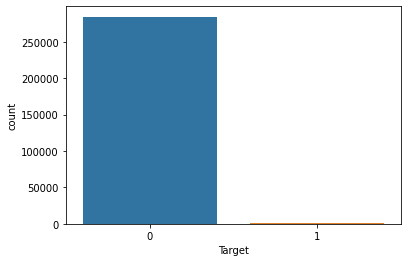

In [38]:
# VERIFICAR A COLUNA Target COM A BIBLIOTECA SEABORN
# '0' NÃO TEVE FRAUDE, E '1' TEVE FRAUDE
base ['Target'].value_counts()
sns.countplot (base['Target'])

In [39]:
# EXPLORAR AS CORRELAÇÕES COM A Target
base.corr() ['Target'].sort_values (ascending = False)

Target             1.000000
antecedentes       0.154876
cep                0.133447
cidade             0.091289
android            0.040413
emprestimos        0.034783
navegador          0.020090
minuto             0.019875
tempo_transacao    0.017580
lim_crt            0.009536
hist_saldo         0.005632
ind_seguranca      0.004455
relacionamento     0.003308
ios                0.000805
compras           -0.002685
limite_global     -0.004223
qtd_trans         -0.004570
hist_navegacao    -0.007221
Timestamp         -0.012323
dia               -0.043643
ip                -0.094974
so                -0.097733
pais              -0.101347
contas            -0.111485
hora              -0.187257
bairro            -0.192961
tipo_crt          -0.196539
valor             -0.216883
reclamacoes       -0.260593
crt               -0.302544
estabelecimento   -0.326481
Name: Target, dtype: float64

In [40]:
# ANÁLISE DE CORRELAÇÃO DA MATRIZ ENTRE COLUNAS E LINHAS VALORES POSITIVOS E NEGATIVOS
base.corr(method= 'spearman')

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
Timestamp,1.000000,0.190647,-0.006419,-0.473348,-0.142156,0.226004,-0.111408,0.116722,-0.103882,0.017986,...,0.096564,0.132651,0.148505,-0.015980,-0.259220,0.000132,-0.035063,-0.143200,-0.040007,-0.011692
pais,0.190647,1.000000,-0.384328,-0.412095,0.101011,-0.106632,-0.086561,-0.227650,-0.236140,0.138614,...,-0.061958,-0.028827,0.145440,-0.000315,0.049291,0.006380,-0.104815,-0.207967,-0.086663,-0.042424
cidade,-0.006419,-0.384328,1.000000,0.073967,0.155042,0.342701,-0.110393,0.426320,0.006980,-0.077880,...,-0.098255,-0.056478,-0.094982,0.012617,-0.085682,0.033865,0.129234,0.137976,-0.502052,0.051062
bairro,-0.473348,-0.412095,0.073967,1.000000,0.060812,-0.223849,0.171263,-0.074582,0.164374,-0.030876,...,-0.040234,0.004404,-0.140076,-0.000559,0.031854,-0.016689,0.140724,0.180169,-0.000236,-0.059278
cep,-0.142156,0.101011,0.155042,0.060812,1.000000,0.021367,0.075185,0.059920,-0.009608,0.105248,...,0.038960,-0.004931,0.009615,-0.008782,0.060647,-0.064357,-0.033634,0.004757,-0.022117,0.063045
ip,0.226004,-0.106632,0.342701,-0.223849,0.021367,1.000000,-0.007577,0.431573,-0.057022,-0.056580,...,-0.040364,-0.010920,-0.108300,-0.023076,-0.015618,0.029513,0.012883,-0.027806,-0.314061,-0.030147
dia,-0.111408,-0.086561,-0.110393,0.171263,0.075185,-0.007577,1.000000,-0.292680,0.444053,0.028864,...,0.034595,0.040370,-0.050293,-0.135166,-0.011131,-0.023932,0.073772,0.020459,0.205452,-0.038410
hora,0.116722,-0.227650,0.426320,-0.074582,0.059920,0.431573,-0.292680,1.000000,-0.389213,-0.100252,...,-0.022250,-0.023750,-0.186343,-0.012879,-0.046468,0.016724,-0.094494,0.056405,-0.030003,-0.048308
minuto,-0.103882,-0.236140,0.006980,0.164374,-0.009608,-0.057022,0.444053,-0.389213,1.000000,-0.002511,...,0.076569,0.019775,0.075212,-0.024536,-0.074303,-0.007648,0.189916,0.089700,0.004371,0.022706
so,0.017986,0.138614,-0.077880,-0.030876,0.105248,-0.056580,0.028864,-0.100252,-0.002511,1.000000,...,-0.065773,0.001958,0.074164,-0.001572,-0.022575,0.026677,-0.001804,-0.103743,-0.077437,-0.049499


In [41]:
# ESTATÍSTICAS DESCRITIVAS DAS VARIÁVEIS
base.describe()

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# PRÉ PROCESSAMENTO DOS DADOS

In [42]:
# SEPARAR A VARIÁVEL X DEPENDENTE E A VARIÁVEL Y INDEPENDENTE
x = base.drop (['Target'], axis=1)
y = base ['Target']

In [43]:
# BALANCEAMENTO DA CLASSE (Target)
smt = SMOTE()

In [44]:
# BALANCEAR AS CLASSES
x, y = smt.fit_resample(x, y)

In [45]:
# CONTAGEM DO TARGET DEPOIS DO SMOTE. OBS: ANTES DA CONTAGEM, PARA USAR A FUNÇÃO BINCOUNT, FOI PRECISO CONVERTER DE FLOAT PARA INTEIRO
yi = y.astype (int)
np.bincount (yi)

array([284315, 284315])

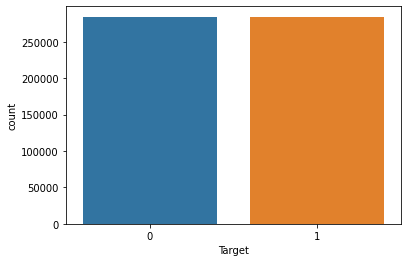

In [46]:
# MOSTRAR EM GRÁFICO O RESULTADO DO BALANCEAMENTO
ax = sns.countplot (x = yi)

In [47]:
# SEPARAR OS DADOS DE TREINO E DADOS DE TESTE
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.3, random_state=7, stratify= y)

# CRIAR A MÁQUINA PREDITIVA DE DETECÇÃO DE FRAUDES

## XGBOOST

In [48]:
# CONSTRUIR O MODELO DA FAMÍLIA UNSAMPLE
from xgboost import XGBClassifier
model = XGBClassifier()

In [49]:
# TREINAR O MODELO
model = model.fit (x_treino, y_treino)
model

XGBClassifier()

In [50]:
# PASSAR OS DADOS DE TESTE PARA O MODELO
y_predict = model.predict (x_teste)

# AVALIANDO A MÁQUINA PREDITIVA

In [51]:
# COMPARANDO GABARITO E PREVIÇÕES DA MÁQUINA E VER OS ACERTOS
gabarito = pd.DataFrame ({'Gabarito': y_teste, 'Previções da máquina': y_predict})
gabarito

,Gabarito,Previções da máquina
32637,0,0
310248,1,1
239726,0,0
264244,0,0
414052,1,1
...,...,...
145904,0,0
57389,0,0
454470,1,1
229461,0,0


## VERIFICAR AS MÉTRICAS

In [52]:
# VERIFICAR A PONTUAÇÃO DO MODELO
print ('Classificação da métrica: \n', classification_report (y_teste, y_predict))
print ('Acurácia: \n', accuracy_score (y_teste, y_predict))

print ('Matriz de confusão: \n', confusion_matrix (y_teste, y_predict))

Classificação da métrica: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     85294
           1       0.99      0.98      0.99     85295

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589

Acurácia: 
 0.9872852294110406
Matriz de confusão: 
 [[84726   568]
 [ 1601 83694]]


## LIGHT GBM

In [53]:
# USAR O MODELO LIGHT GBM
train_data = lgb.Dataset (x_treino, label= y_treino)
# CONFIGURAÇÃO DE PARÂMETROS
Param = {'um_leaves': 1000,
         'objective':'binary',
         'max_depth':7,
         'learning_rate':.01,
         'max_bin':200}

Param ['metric'] = ['auc', 'binary_logloss']
# TREIANDO O MODELO DE LIGHT GBM
num_round = 50

lgbm = lgb.train (Param, train_data, num_round)

In [54]:
#  PASSANDO NOVOS DADOS DE TESTE PARA O MODELO
y_predict = lgbm.predict (x_teste)

# AVALIANDO A MÁQUINA PREDITIVA

In [55]:
# COMPARANDO GABARITO E PREVISÕES DA MÁQUINA
gabarito = pd.DataFrame ({'Gabarito': y_teste, 'Previsões da máquina': y_predict})
gabarito

,Gabarito,Previsões da máquina
32637,0,0.306043
310248,1,0.696106
239726,0,0.432556
264244,0,0.306043
414052,1,0.696106
...,...,...
145904,0,0.321161
57389,0,0.306043
454470,1,0.696106
229461,0,0.306043


In [56]:
# MOSTRAR O TAMANHO DA BASE DE DADOS DA VARIÁVEL  y_predict
y_predict.size

170589

In [57]:
# CONVERTENDO PROBABILIDADES EM 0 E 1
for i in range (0, 170589):
  if y_predict [i] >=.5:      # DEFINIR O LIMITE PARA .5, ESTOU DEFININDO QUE ACIMA DE 50% É FRAUDE
    y_predict [i] = 1
  else:
    y_predict [i] = 0

## VERIFICAR AS MÉTRICAS

In [58]:
# AVALIAR O MODELO
print ('Classificação das métricas: \n', classification_report (y_teste, y_predict))
print ('Acurácia: \n', accuracy_score (y_teste, y_predict))

print ('Matriz de confusão: \n', confusion_matrix (y_teste, y_predict))

Classificação das métricas: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     85294
           1       0.99      0.97      0.98     85295

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589

Acurácia: 
 0.9809835335220911
Matriz de confusão: 
 [[84463   831]
 [ 2413 82882]]


## RANDOM FOREST

In [59]:
# CONSTRUIR O MODELO
model = RandomForestClassifier()

In [60]:
# TREINAR O MODELO
model = model.fit (x_treino, y_treino)
model

RandomForestClassifier()

In [61]:
# PASSANDO NOVOS DADOS DE TESTE PARA O MODELO
y_predict = model.predict (x_teste)

# AVALIANDO A MÁQUINA PREDITIVA

In [65]:
gabarito = pd.DataFrame({'Gabarito': y_teste, 'Previsões da máquina': y_predict})
gabarito

,Gabarito,Previsões da máquina
32637,0,0
310248,1,1
239726,0,0
264244,0,0
414052,1,1
...,...,...
145904,0,0
57389,0,0
454470,1,1
229461,0,0


## VERIFICAR AS MÉTRICAS

In [66]:
# EVOLUÇÃO DO MODELO
print ('Classificação das Métricas: \n', classification_report (y_teste, y_predict))
print ('Acurácia: \n', accuracy_score (y_teste, y_predict))
print ('Matriz de confusão: \n', confusion_matrix (y_teste, y_predict))

Classificação das Métricas: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       1.00      1.00      1.00     85295

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Acurácia: 
 0.9998886211889395
Matriz de confusão: 
 [[85275    19]
 [    0 85295]]


# CONCLUSÕES FINAIS

In [67]:
# FORAM UTILIZADOS 3 MODELOS DE MACHINE LEARNING: XGBOOST, LIGHT GBM E RANDOM FOREST
# XGBOOST ACURÁCIA: 0.98% (PRECISION: 0.98%, RECALL: 0.99%, F1: 0.99%)
# LIGHT GBM ACURÁCIA: 0.98% (PRECISION: 0.97%, RECALL: 0.99%, F1: 0.98%)
# RANDOM FOREST ACURÁCIA: 0.99% (PRECISION: 100%, RECALL: 100%, F1: 100%)

# MELHOR MODELO PREDITIVO: RANDOM FOREST